WSI LAB 1

Autor: Tomasz Kurzela

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def gradient_descent(grad_func, starting_point, beta, max_iter=1_000, eps=1e-5, minimize=True, mark_trajectory=False):
    point = starting_point
    dir = -1 if minimize else 1
    trajectory = [point]
    step = beta * grad_func(starting_point)

    for iter in range(max_iter):
        step = dir * beta * grad_func(point)
        point = point + step
        trajectory.append(point)
        if np.linalg.norm(step) < eps:
            break

    if mark_trajectory:
        return np.array(trajectory)
    return point

In [ ]:
def f(x, x2 = None):
    if x2 is not None:
        return x ** 2 + x2 ** 2
    
    x = np.asarray(x)
    return np.sum(x**2, axis=-1)


def f_grad(X):
    X = np.asarray(X)
    x1, x2 = X[..., 0], X[..., 1]
    return np.stack((2 * x1, 2 * x2), axis=-1)


def Matyas(x, x2 = None):
    if x2 is not None:
        return 0.26 * (x**2 + x2**2) - 0.48 * x * x2
    
    x = np.asarray(x)
    return 0.26 * np.sum(x**2, axis=-1) - 0.48 * np.prod(x, axis=-1)


def Matyas_grad(X):
    X = np.asarray(X)
    x1, x2 = X[..., 0], X[..., 1]
    grad_x1 = 0.52 * x1 - 0.48 * x2
    grad_x2 = 0.52 * x2 - 0.48 * x1
    return np.stack((grad_x1, grad_x2), axis=-1)


# 1. Badanie wartości współczynnika kroku

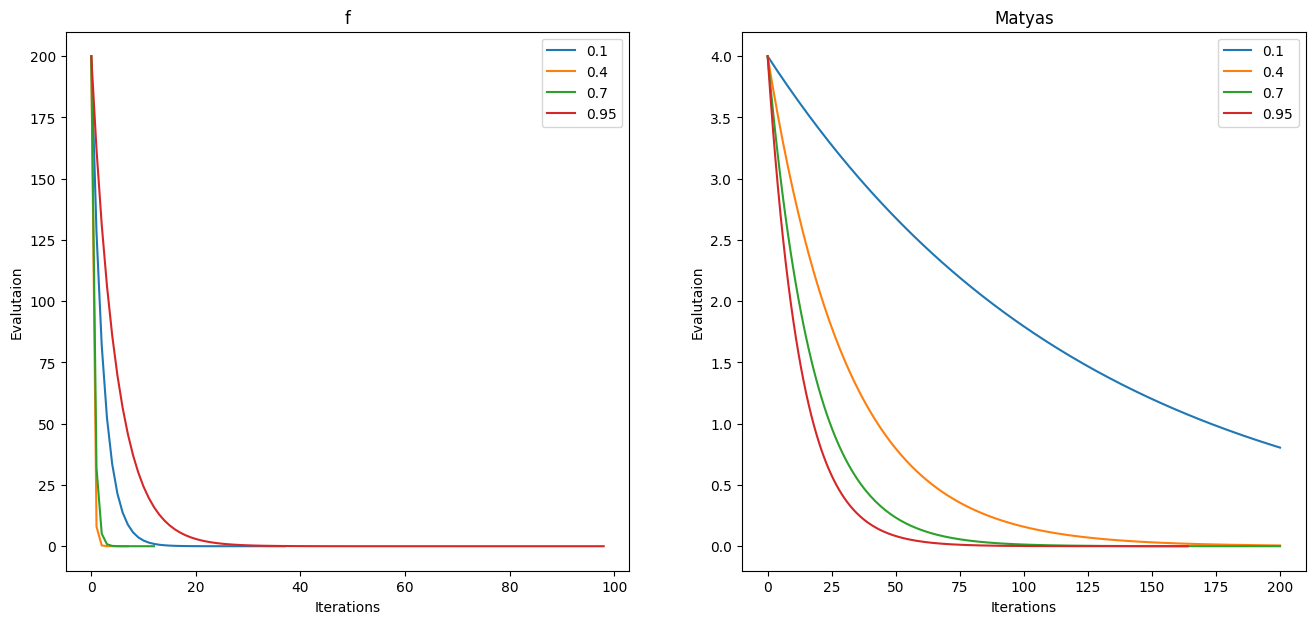

Testing big beta values for f
beta=0.9, best: 0.00, iterations: 48
beta=0.95, best: 0.00, iterations: 99
beta=0.99, best: 0.00, iterations: 509
beta=1, best: 200.00, iterations: 1001
beta=1.4, best: 200.00, iterations: 1001
beta=1.8, best: 200.00, iterations: 1001


In [68]:
MIN_X = -10
MAX_X = 10

betas = [0.1, 0.4, 0.7, 0.95]

# starting_points = np.random.uniform(MIN_X, MAX_X, [10, 2])

fig, axes = plt.subplots(1, 2)

clumped = [(f, f_grad), (Matyas, Matyas_grad)]

for ax, (fun, grad) in zip(axes, clumped):
    for beta in betas:
        trajectory = gradient_descent(
            grad, [10, 10], beta=beta, max_iter=200, eps=1e-3, mark_trajectory=True
        )
        values = fun(trajectory)
        ax.plot(values, label=f"{beta}")
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Evalutaion")
        ax.set_title(fun.__name__)
        ax.legend()

fig.set_size_inches(16, 7)
plt.show()

## Testing for big values of beta
import warnings
warnings.filterwarnings('ignore')

big_betas = [0.9, 0.95, 0.99, 1, 1.4, 1.8]

print("Testing big beta values for f")
for beta in big_betas:
    trajectory = gradient_descent(f_grad, [10, 10], beta=beta, eps=1e-3, mark_trajectory=True)
    values = f(trajectory)
    print(f'{beta=}, best: {min(values):.2f}, iterations: {len(trajectory)}')

## Wnioski

Dla punktu startowego [10, 10] i dla obu badanych funkcji większy współczynnik kroku oznacza szybsze zbieganie algorytmu do minimum. Jednakże dla wartości bliskiej 1, algorytm wykonuje dużo więcej kroków, a dla wartości 1 i więcej w ogóle nie osiąga minimum. 

(patrz: wykres *f*, wykres dla beta=0.95)

# 2. Wykres przebiegu optymalizacji

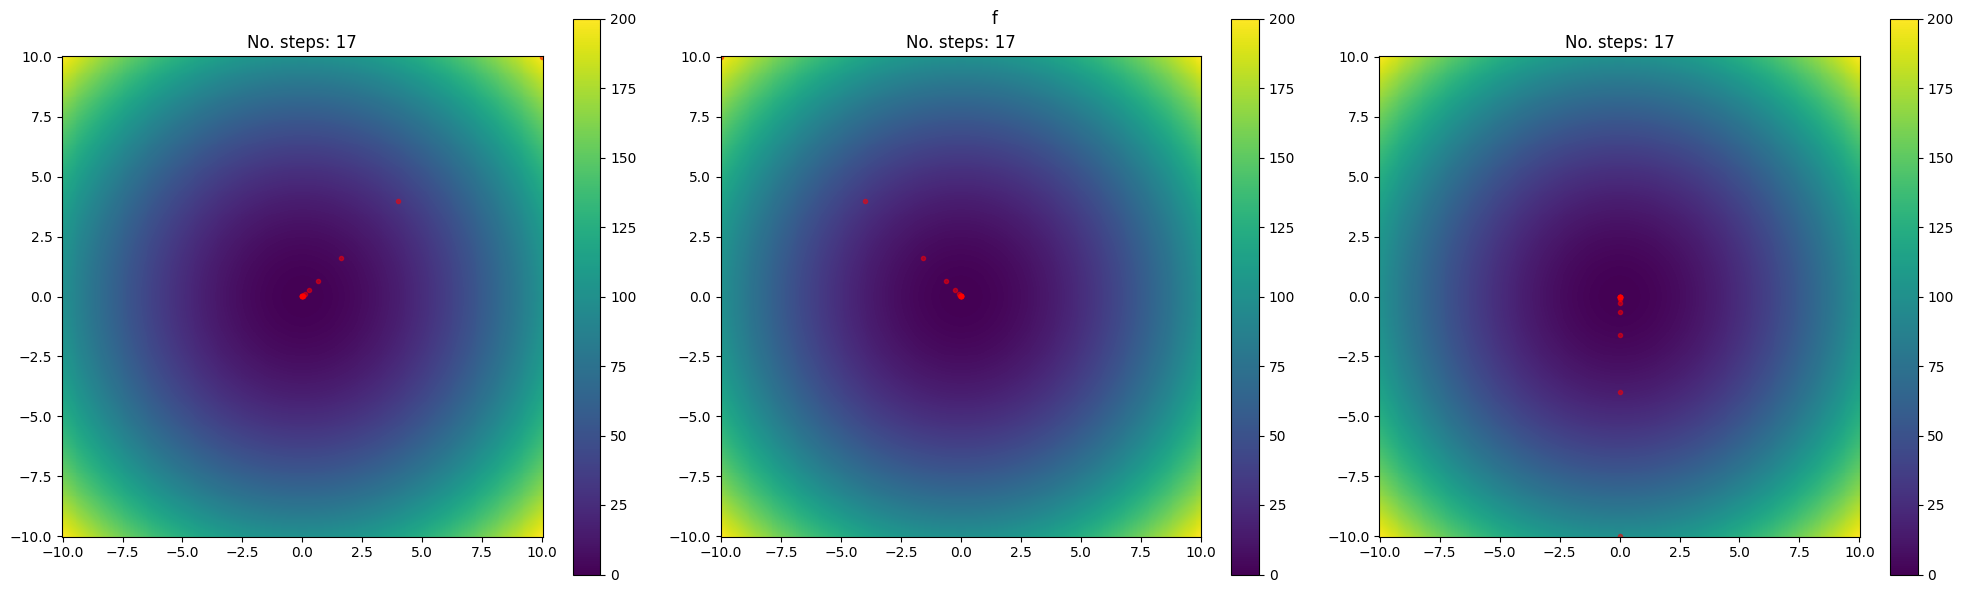

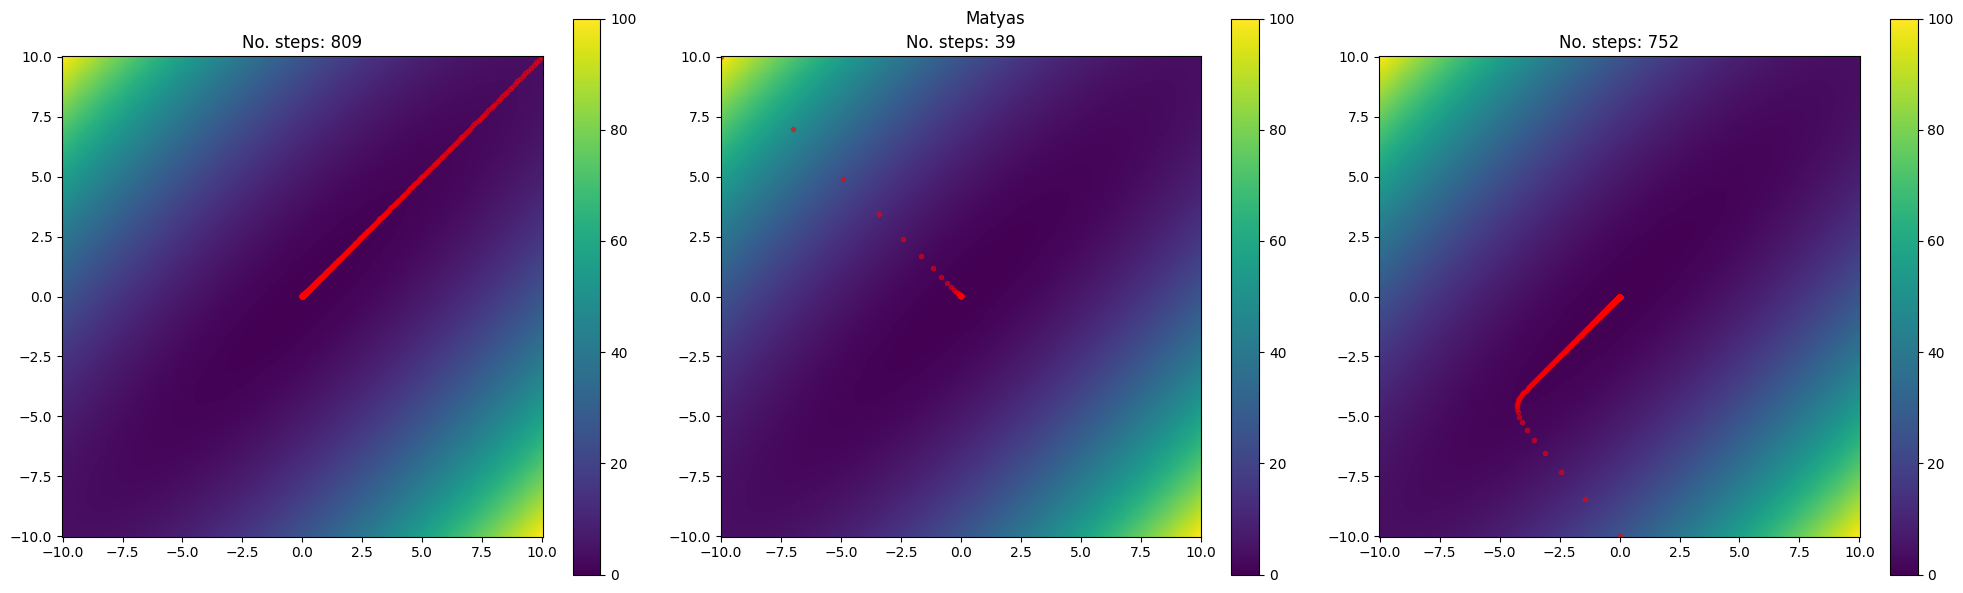

In [43]:
MIN_X = -10
MAX_X = 10
PLOT_SIZE = 501
PLOT_STEP = 0.1

BETA = 0.3

starting_points = np.array([[10, 10], [-10, 10], [0, -10]])

x1 = np.linspace(MIN_X, MAX_X, PLOT_SIZE)

X1, X2 = np.meshgrid(x1, x1)


for fun, grad in clumped:
    Z = fun(X1, X2)
    fig, axes = plt.subplots(1, len(starting_points))
    for idx, sp in enumerate(starting_points):
        trajectory = gradient_descent(grad, sp, beta=BETA, mark_trajectory=True)
        pcm = axes[idx].pcolormesh(X1, X2, Z, cmap="viridis", shading="auto")

        fig.colorbar(pcm, ax=axes[idx])

        axes[idx].scatter(
            trajectory[:, 0], trajectory[:, 1], marker=".", color="red", alpha=0.5
        )

        axes[idx].set_aspect(1.0)
        axes[idx].set_title(f'No. steps: {len(trajectory)}')

    fig.set_size_inches(20, 6)
    fig.tight_layout()
    fig.suptitle(fun.__name__)
    plt.show()


## Wnioski

Wybór punktu startowego wpływa na przebieg wykonania algorytmu. Dla funkcji *Matyas* gradient przyjmuje niewielką wartośc w okolicy prostej $x1=x2$, zatem jeśli algorytm dojdzie do tego miejsca, będzie potrzebował wielu kroków do znalezienia minimum. Dla punktów w okolicy prostej $x1=-x2$ gradient ma dużą wartość i algorytm zbiega szybciej, wymagając mniej kroków.

Dla funkcji *f* wybór punktu startowego ma mniejsze znaczenie.

# Podsumowanie

Algorytm najszybszego spadku gradientowego to dobra metoda znajdywania ekstremów funkcji, dla których można wyliczyć pochodną. Dla optymalnych rezultatów należy uruchomić algorytm wielokrotnie z różnymi punktami startowymi, aby zmaksymalizować szansę znalezienia esktremum globalnego.